In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [ ]:
df = pd.read_csv("/content/Walmart DataSet.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Data Cleaning

In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

# Exploratory Data Analysis (EDA)

*Converting the Date Column from the dataset into datetime format*

In [ ]:
df["Date"] = pd.to_datetime(df.Date)

<ipython-input-8-ccbc6b250f10>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df.Date)


*Further creating 3 more columns (Day, Month, Year) from the Date column*

In [ ]:
df['Day'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


*For our easy understanding of the distribution of the data we convert the Days and Months into categorical columns*

In [ ]:
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['Day'] = df['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['Month']= df['Month'].map(months)
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   object        
 9   Month         6435 non-null   object        
 10  Year          6435 non-null   int64         
 11  Week          6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 584.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,23.0,12.988182,1.0,12.0,23.0,34.0,45.0
Weekly_Sales,6435.0,1046964.877562,564366.622054,209986.25,553350.105,960746.04,1420158.66,3818686.45
Holiday_Flag,6435.0,0.06993,0.255049,0.0,0.0,0.0,0.0,1.0
Temperature,6435.0,60.663782,18.444933,-2.06,47.46,62.67,74.94,100.14
Fuel_Price,6435.0,3.358607,0.45902,2.472,2.933,3.445,3.735,4.468
CPI,6435.0,171.578394,39.356712,126.064,131.735,182.616521,212.743293,227.232807
Unemployment,6435.0,7.999151,1.875885,3.879,6.891,7.874,8.622,14.313
Year,6435.0,2010.965035,0.797019,2010.0,2010.0,2011.0,2012.0,2012.0
Week,6435.0,26.0,14.511794,1.0,14.0,26.0,38.0,52.0


*We check the outliers in the dataset with the help of boxplots and Flatten the 2D array of axes for easier iteration*

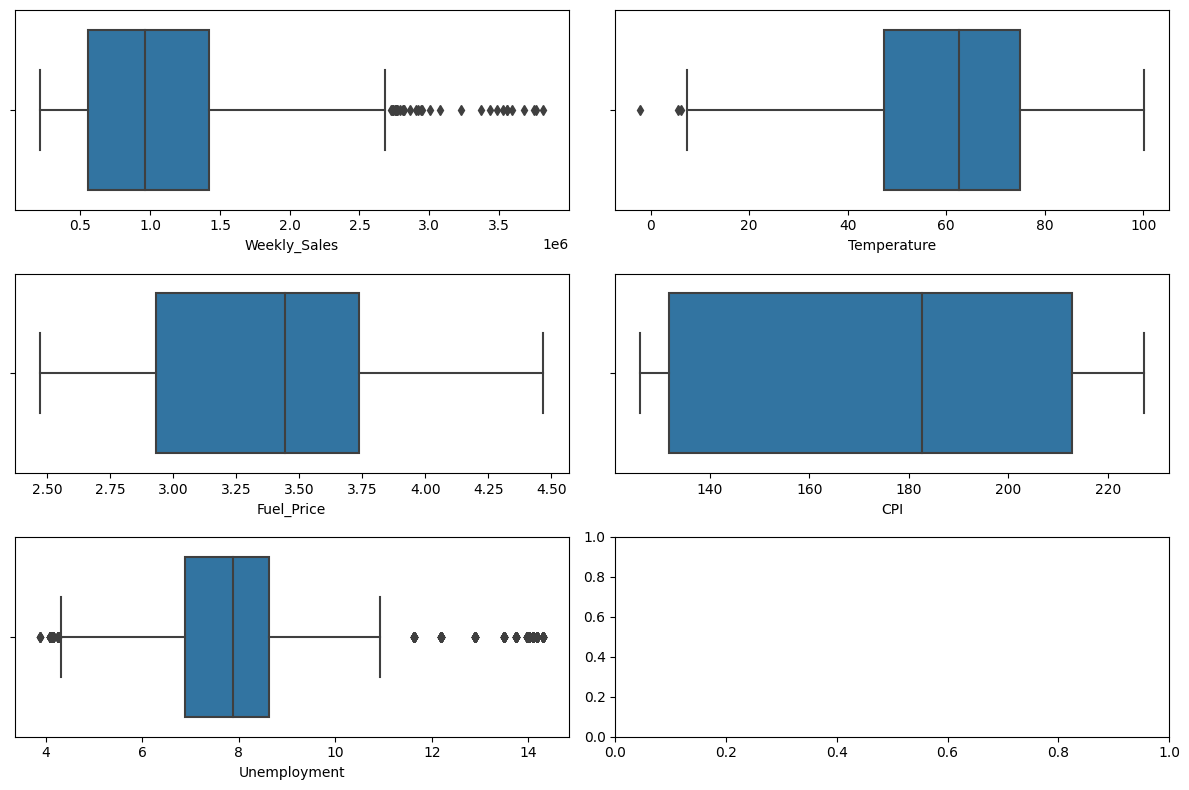

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

columns = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]

for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

*Create a function to remove the outliers from the columns -  Weekly Sales, Temperature and Unemployment*

In [ ]:
def removing_outliers():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))

removing_outliers()

*Again checking for the removal of the outliers with the help of boxplots*

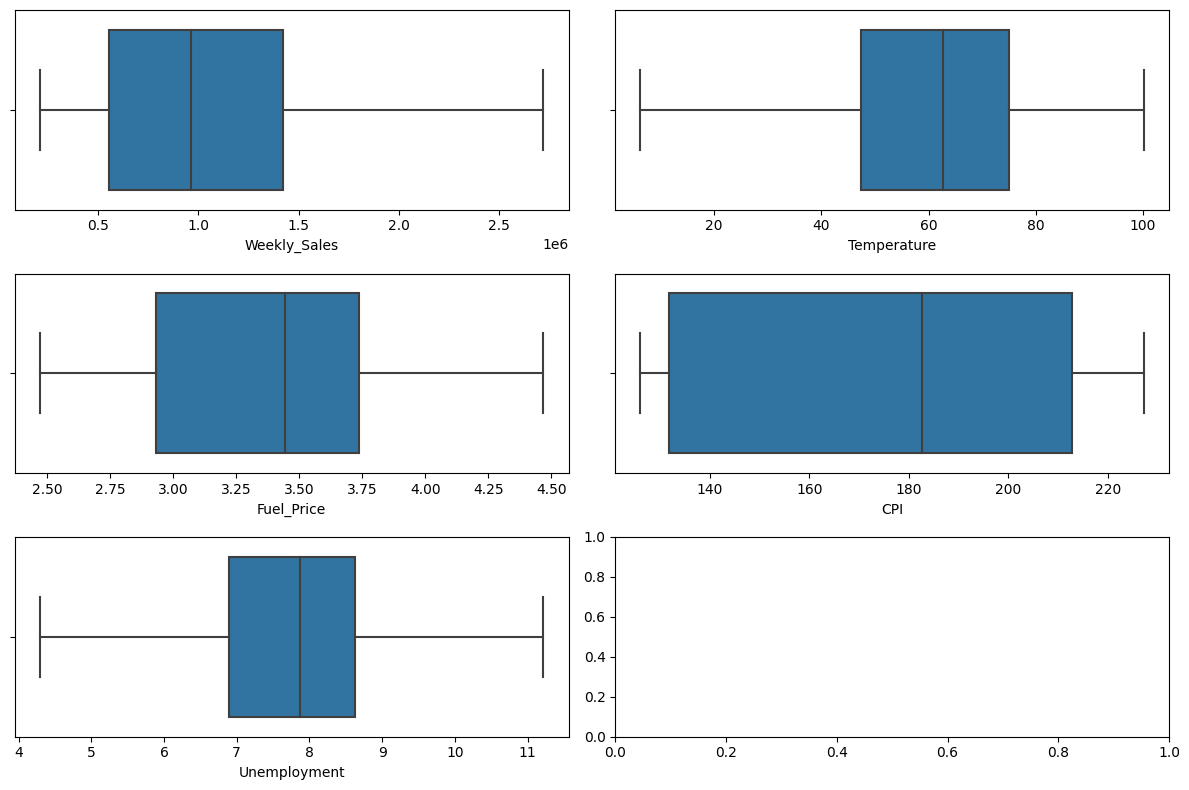

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = axes.flatten()

columns = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]

for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

*Further we check the correlation of each column with other columns and depict the same with the help of a Heatmap from the Seaborn Library*

In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Week
Store,1.000000e+00,-0.336559,-4.386841e-16,-0.022749,0.060023,-0.209492,0.255964,3.474318e-12,1.038488e-15
Weekly_Sales,-3.365589e-01,1.000000,3.670284e-02,-0.060808,0.010998,-0.072627,-0.108662,-1.634436e-02,6.108660e-02
Holiday_Flag,-4.386841e-16,0.036703,1.000000e+00,-0.155149,-0.078347,-0.002162,0.011204,-5.678257e-02,3.288032e-01
Temperature,-2.274937e-02,-0.060808,-1.551494e-01,1.000000,0.144962,0.176960,0.088315,6.428798e-02,7.313296e-02
Fuel_Price,6.002295e-02,0.010998,-7.834652e-02,0.144962,1.000000,-0.170642,-0.053428,7.794703e-01,-4.193804e-02
CPI,-2.094919e-01,-0.072627,-2.162091e-03,0.176960,-0.170642,1.000000,-0.278542,7.479573e-02,2.782979e-03
Unemployment,2.559643e-01,-0.108662,1.120376e-02,0.088315,-0.053428,-0.278542,1.000000,-2.526376e-01,-6.786673e-03
Year,3.474318e-12,-0.016344,-5.678257e-02,0.064288,0.779470,0.074796,-0.252638,1.000000e+00,-1.269874e-01
Week,1.038488e-15,0.061087,3.288032e-01,0.073133,-0.041938,0.002783,-0.006787,-1.269874e-01,1.000000e+00


# Visualization

<ipython-input-19-ca88d1699f55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Greens', annot = True)


<Axes: >

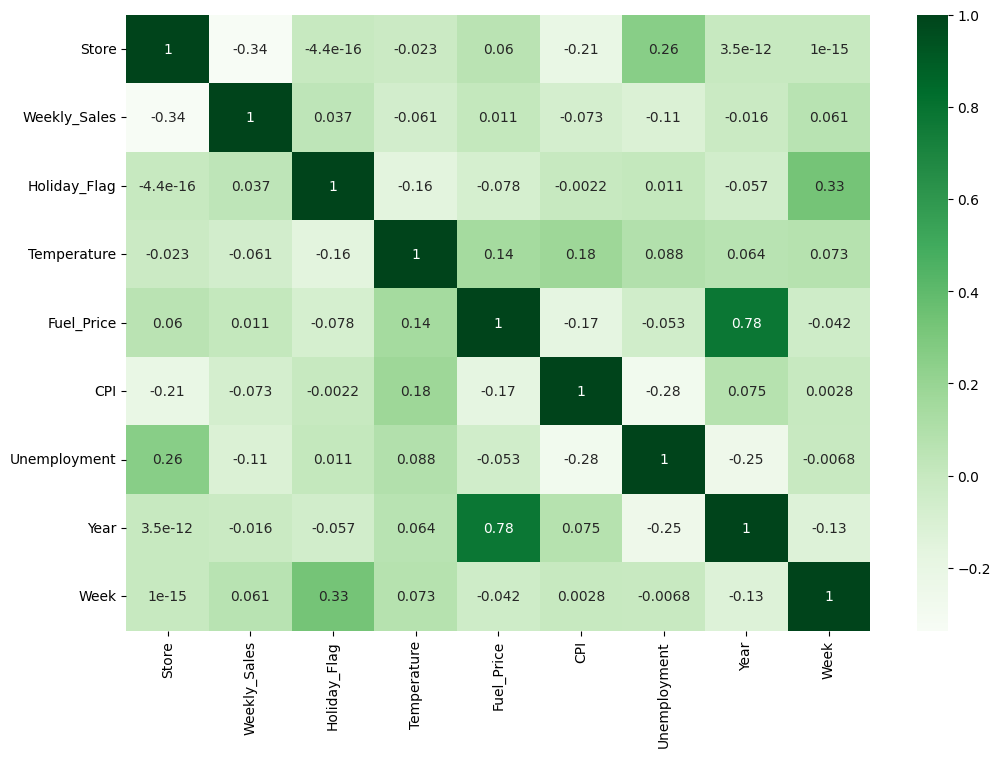

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), cmap = 'Greens', annot = True)

Checking the correlation between the column Weekly Sales with other columns.

Weekly sales with Date

In [ ]:
df['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

<Axes: >

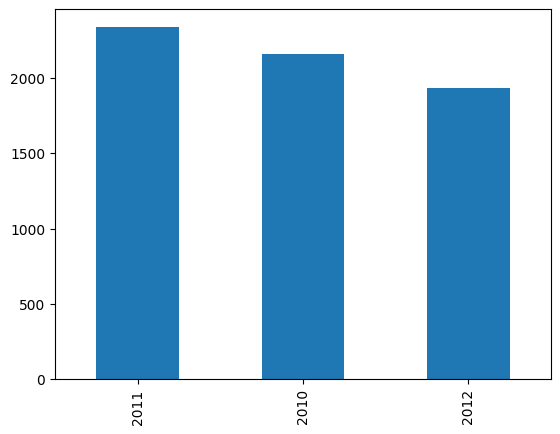

In [ ]:
df['Year'].value_counts().plot(kind = 'bar')

*Most sales were made in 2011*

In [ ]:
df['Month'].value_counts()

April        630
May          585
September    585
July         585
October      585
March        540
June         540
August       540
December     495
February     495
January      450
November     405
Name: Month, dtype: int64

<Axes: >

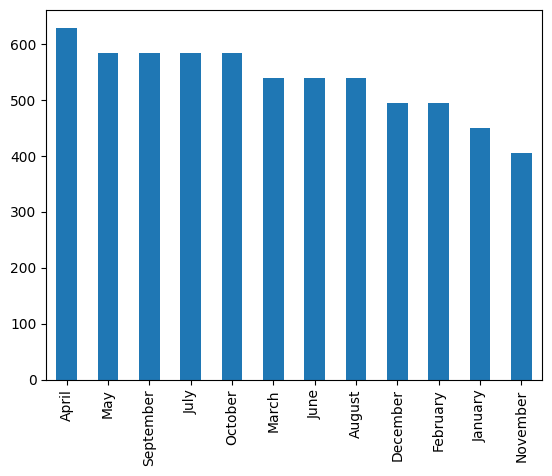

In [ ]:
df['Month'].value_counts().plot(kind = 'bar')

*The highest amount of sales are during April and it dips around in November*

In [ ]:
df['Day'].value_counts()

Thursday     4320
Sunday        495
Wednesday     450
Saturday      405
Monday        405
Friday        270
Tuesday        90
Name: Day, dtype: int64

<Axes: >

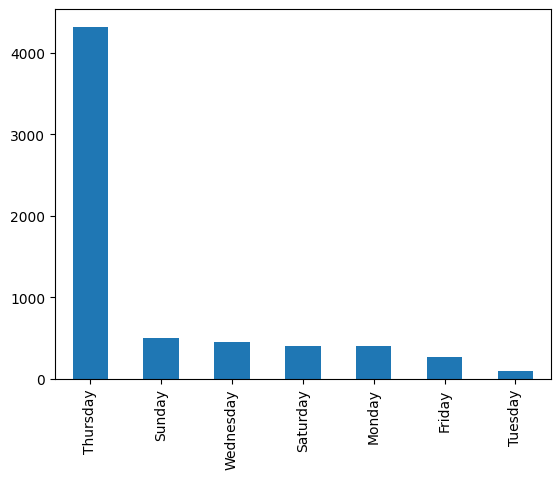

In [ ]:
df['Day'].value_counts().plot(kind = 'bar')

*Thursday accounts for the highest sales*

In [ ]:
df['Week'].value_counts()

17    180
41    180
19    180
37    180
28    180
1     180
15    180
42    135
38    135
43    135
50    135
40    135
13    135
10    135
33    135
32    135
23    135
30    135
29    135
34    135
36    135
7     135
24    135
44    135
21    135
8     135
20    135
16    135
25    135
5     135
12    135
11    135
3      90
4      90
22     90
31     90
26     90
9      90
6      90
39     90
2      90
46     90
52     90
51     90
47     90
49     90
18     90
35     90
27     90
48     90
14     90
45     90
Name: Week, dtype: Int64

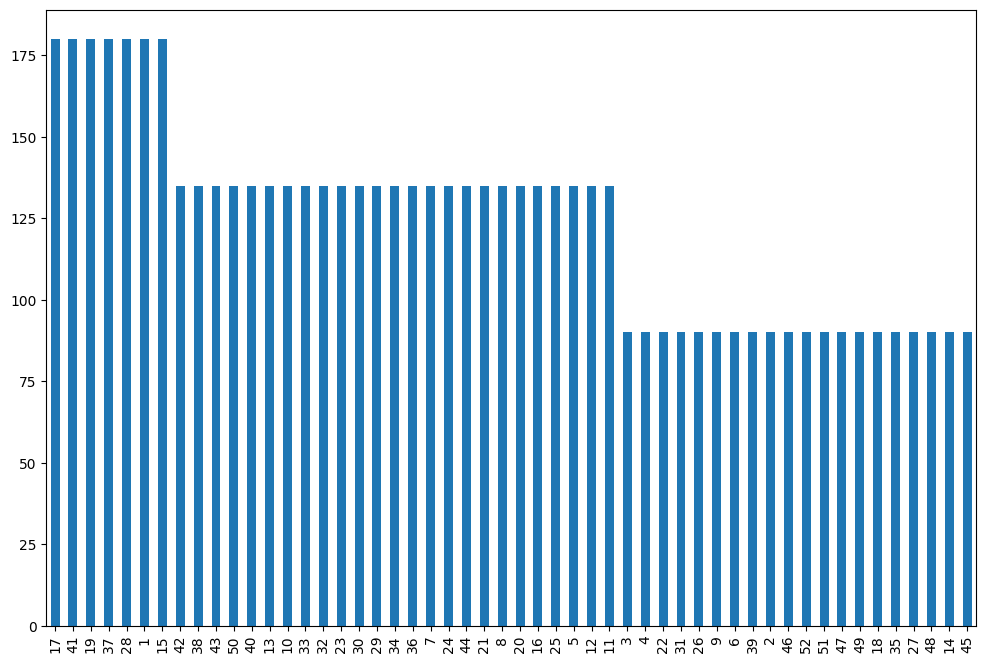

In [ ]:
df['Week'].value_counts().plot(figsize=(12, 8), kind='bar')
plt.show()

*Week - 17, 41, 19, 37, 28 and 1 account for the weeks with highest of the sales*

<Axes: >

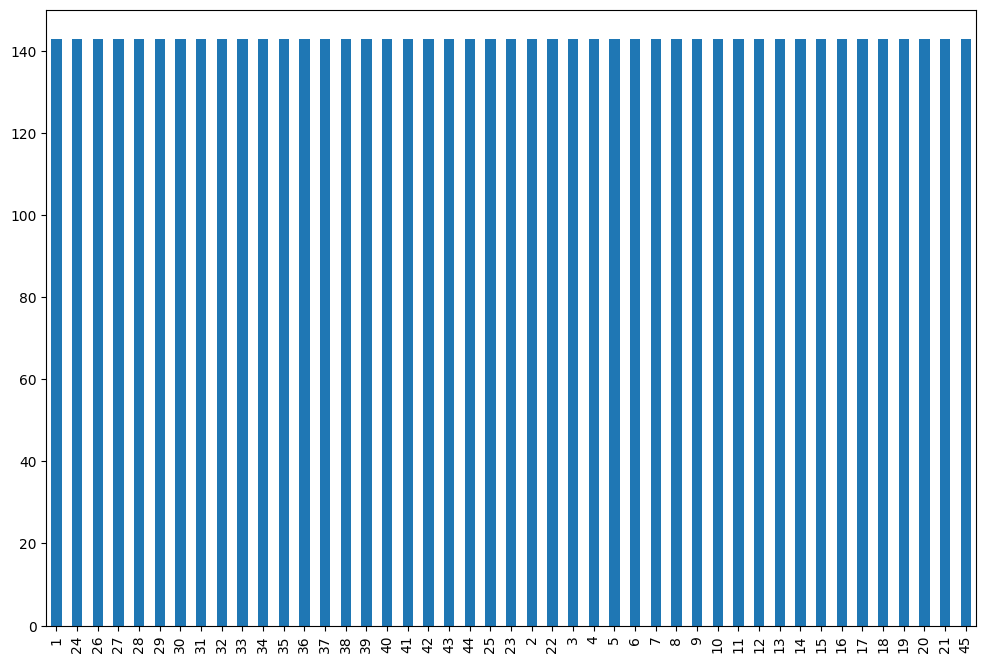

In [ ]:
df['Store'].value_counts().plot(figsize = (12,8), kind = 'bar')

Weekly Sales with Holiday Flag

In [ ]:
df.groupby('Holiday_Flag')['Weekly_Sales'].sum().sort_values(ascending = False)

Holiday_Flag
0    6.220935e+09
1    5.038284e+08
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Holiday_Flag'>

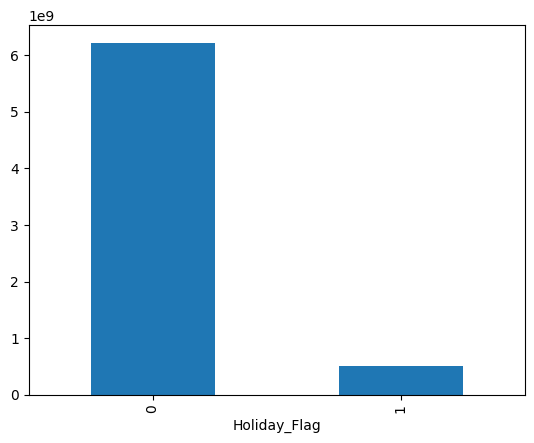

In [ ]:
df.groupby('Holiday_Flag')['Weekly_Sales'].sum().sort_values(ascending = False).plot(kind = 'bar')

*Most sales were made on the days when no holiday was there.*

In [ ]:
store_with_weekly_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending = False)
store_with_weekly_sales

Store
20    2.990663e+08
4     2.973575e+08
14    2.870091e+08
13    2.845247e+08
2     2.741628e+08
10    2.692807e+08
27    2.534795e+08
6     2.237489e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987367e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

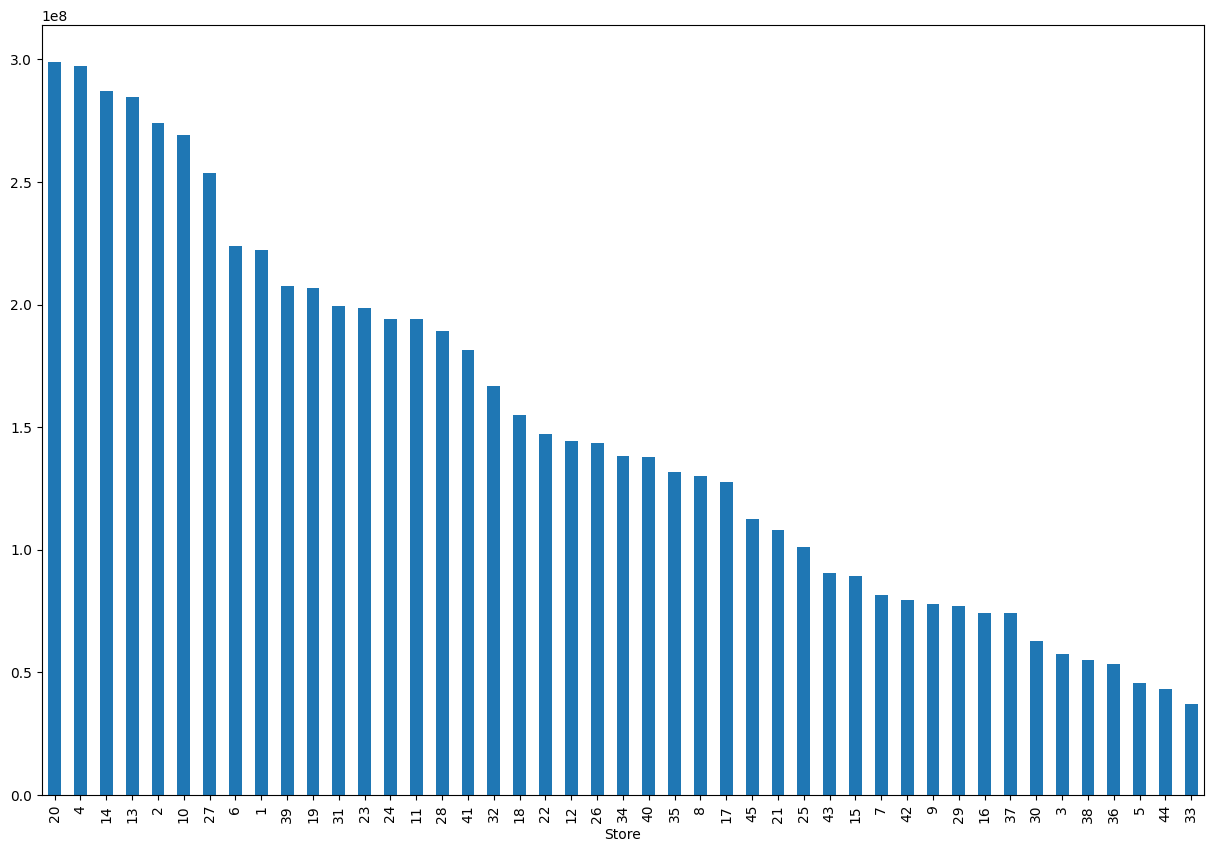

In [ ]:
store_with_weekly_sales.plot(figsize = (15,10), kind = 'bar')

*Store 20 made the highest sales while store 33 made the lowest sales.*

In [ ]:
df.groupby(["Week"])["Weekly_Sales"].sum().sort_values(ascending= False)

Week
41    1.905628e+08
37    1.866619e+08
28    1.861896e+08
15    1.854418e+08
19    1.841248e+08
1     1.815590e+08
17    1.807027e+08
50    1.675980e+08
23    1.529603e+08
51    1.474136e+08
7     1.471902e+08
5     1.462024e+08
10    1.445892e+08
24    1.434817e+08
40    1.433135e+08
36    1.421432e+08
33    1.413328e+08
32    1.412186e+08
21    1.409434e+08
34    1.407740e+08
25    1.401614e+08
44    1.397901e+08
16    1.384837e+08
13    1.384066e+08
11    1.367628e+08
29    1.362228e+08
20    1.359906e+08
43    1.350028e+08
42    1.340080e+08
8     1.338659e+08
30    1.324108e+08
12    1.320040e+08
47    1.309435e+08
38    1.284312e+08
14    9.731274e+07
27    9.571493e+07
45    9.540010e+07
18    9.488694e+07
9     9.485760e+07
6     9.476718e+07
35    9.452493e+07
48    9.426207e+07
31    9.374673e+07
49    9.237437e+07
22    9.181738e+07
46    9.156456e+07
26    8.937290e+07
52    8.647498e+07
39    8.593073e+07
3     8.273564e+07
2     8.269676e+07
4     7.943483e+07
Name: W

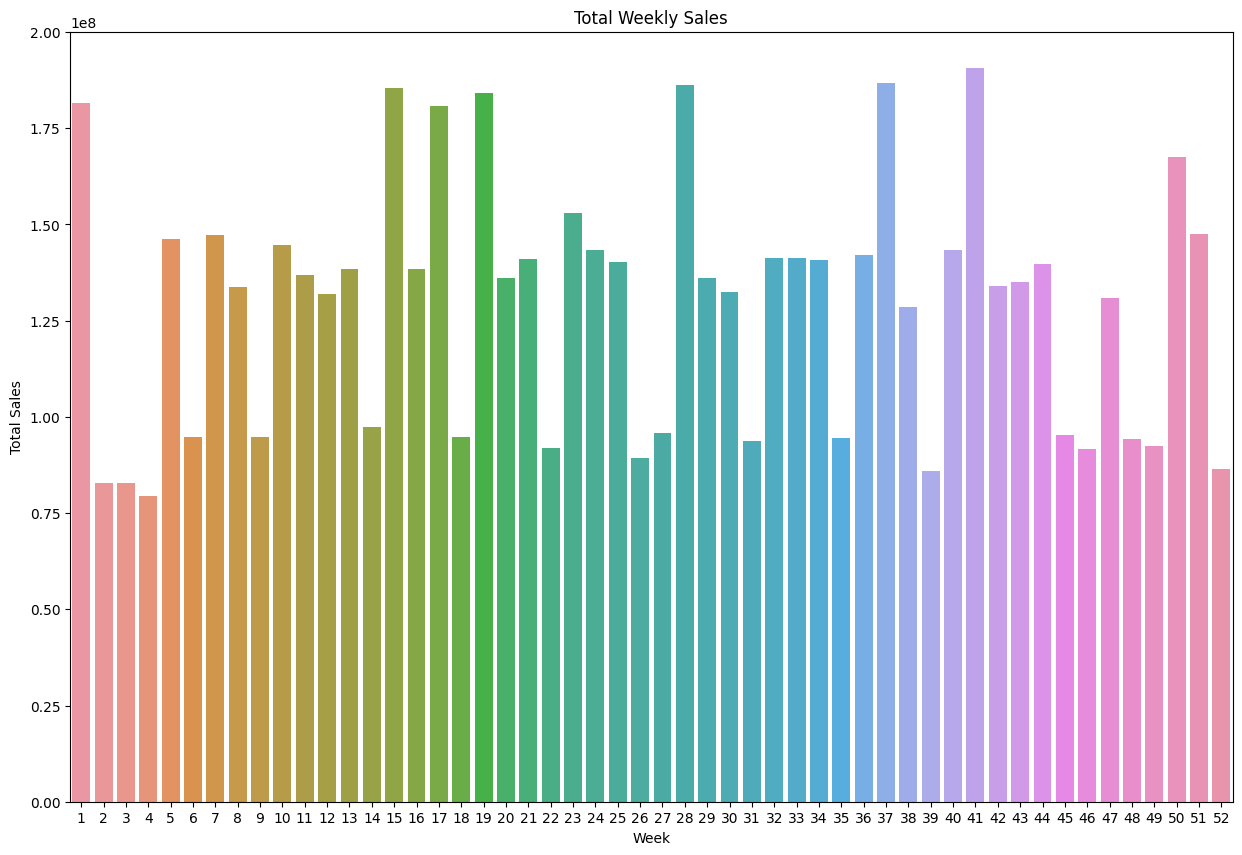

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df.groupby(["Week"])["Weekly_Sales"].sum().sort_values().index, y=df.groupby(["Week"])["Weekly_Sales"].sum().sort_values().values)
plt.title('Total Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()

*The highest sales in a week was during the 41st week and the lowest was in the 4th week.*

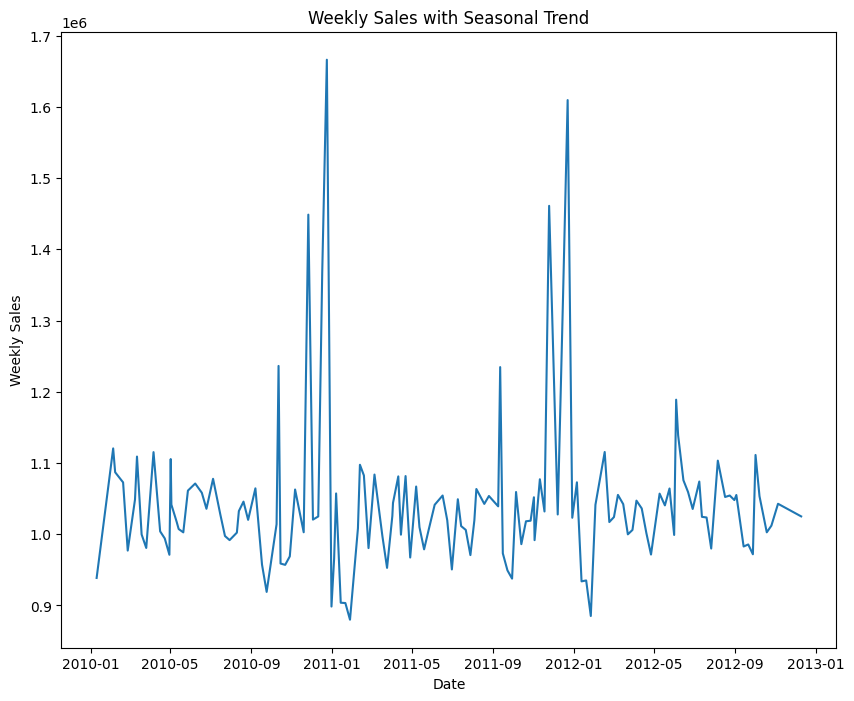

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='Date', y='Weekly_Sales', data=df, errorbar=None)
plt.title('Weekly Sales with Seasonal Trend')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

*It shows a trend that the sales majorly peaked from mid november to january(christmas,new year)*

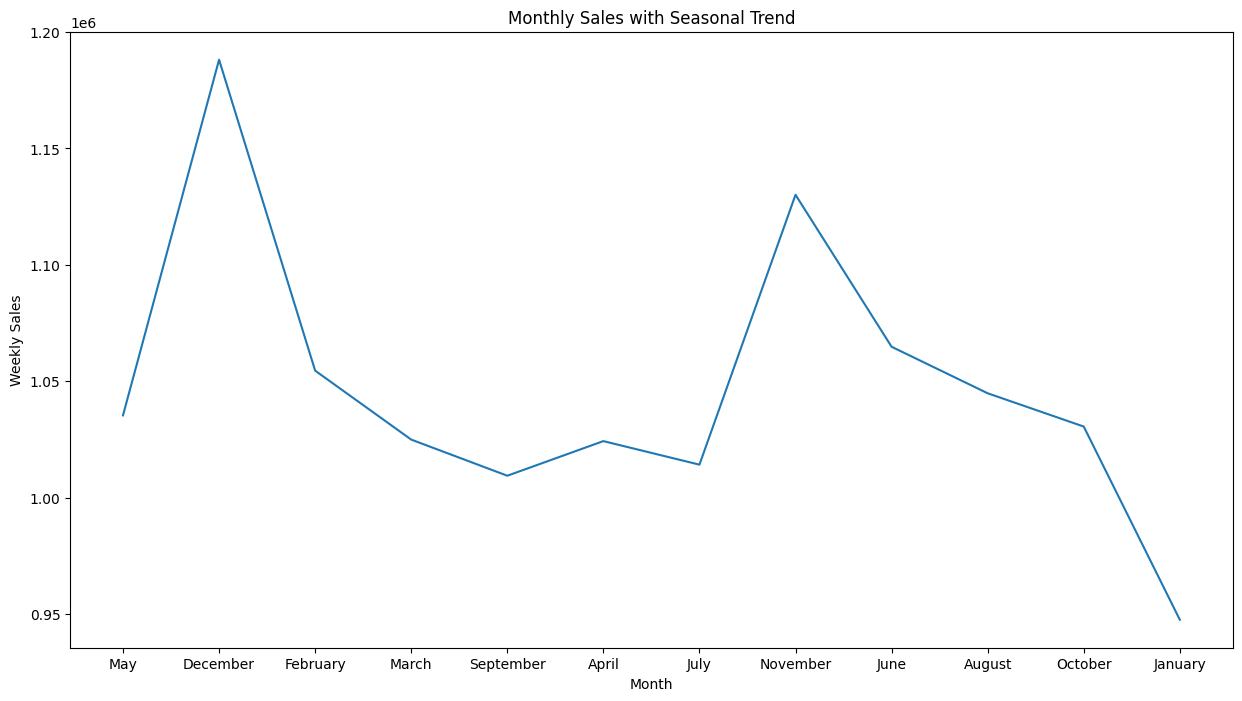

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Month', y='Weekly_Sales', data=df, errorbar=None)
plt.title('Monthly Sales with Seasonal Trend')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

*The sales were highest in april 2010 and in july in 2011*

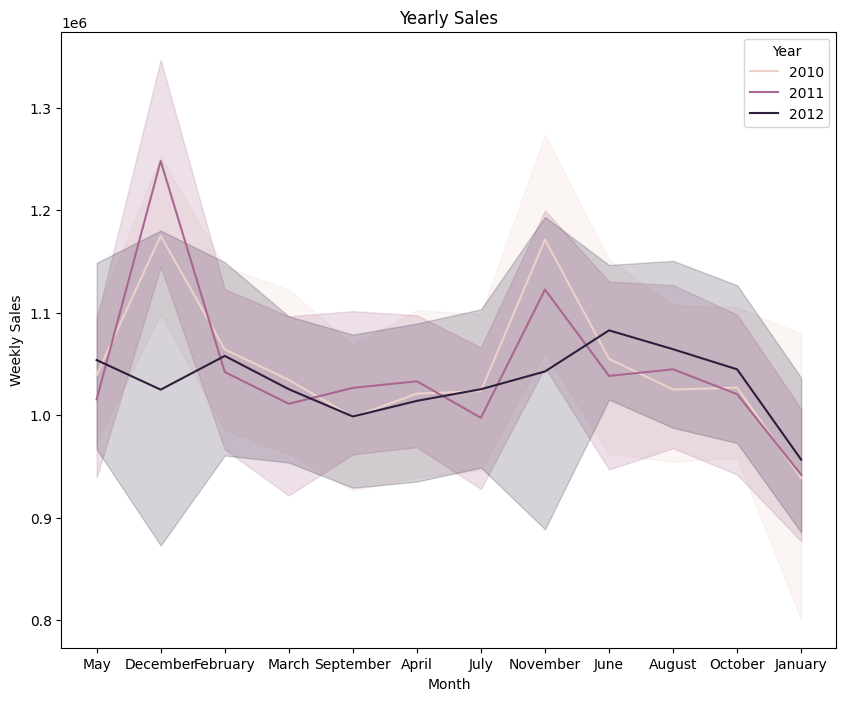

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x='Month', y='Weekly_Sales', hue='Year')
plt.title('Yearly Sales')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

Weekly Sales and Temperature

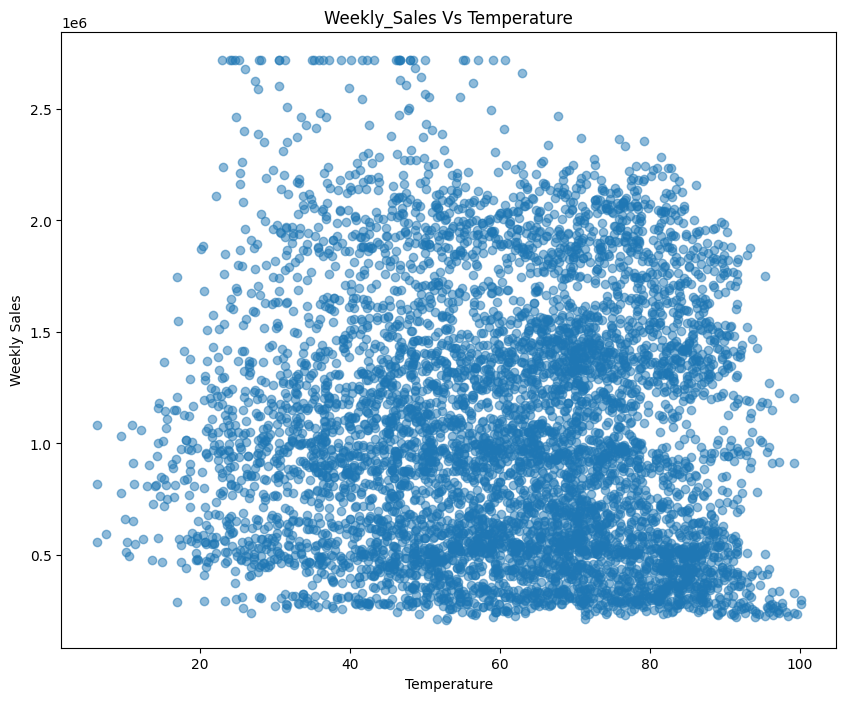

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(data = df, x = 'Temperature', y = 'Weekly_Sales', alpha = 0.5)
plt.title('Weekly_Sales Vs Temperature')
plt.xlabel("Temperature")
plt.ylabel('Weekly Sales')
plt.show()

*Slightly correlated to each other -- most sales were made b/w 60degrees to 80 degrees*

<Axes: xlabel='Date'>

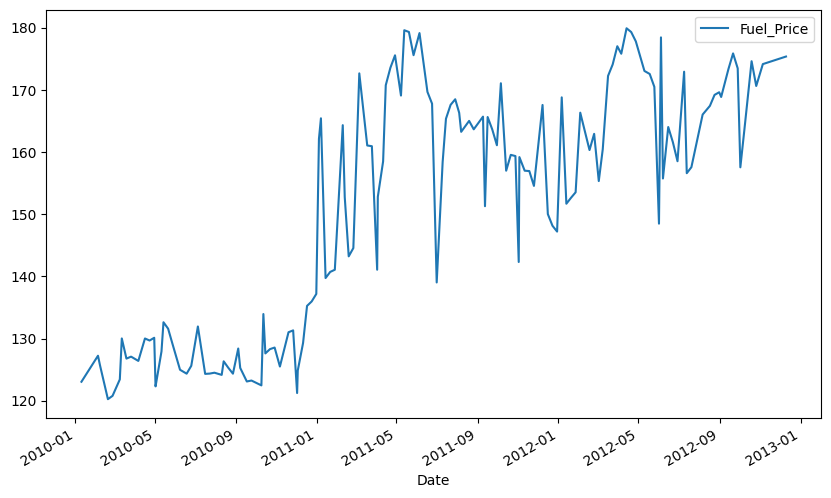

In [ ]:
fuelprice_with_date = df.groupby('Date')[['Fuel_Price']].sum()
fuelprice_with_date.plot(figsize =(10,6))

*There has been an increase in the fuel price over the years*

*No connection between temperature and holiday flag so skipping to fuel price*

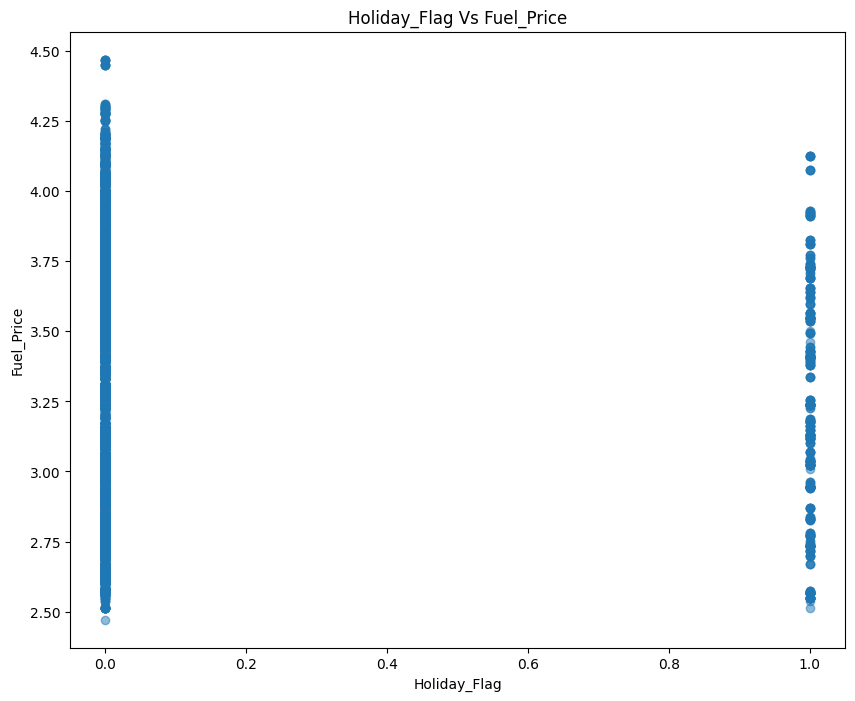

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(data = df, x = 'Holiday_Flag', y = 'Fuel_Price', alpha = 0.5)
plt.title('Holiday_Flag Vs Fuel_Price')
plt.xlabel('Holiday_Flag')
plt.ylabel('Fuel_Price')
plt.show()

<Axes: xlabel='Fuel_Price', ylabel='Count'>

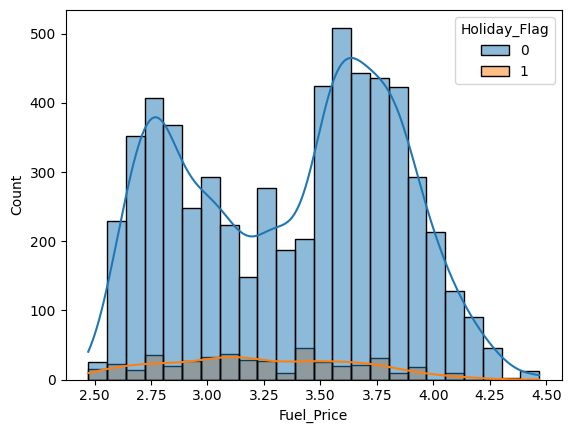

In [ ]:
sns.histplot(df, x = 'Fuel_Price', hue = 'Holiday_Flag', kde = True)

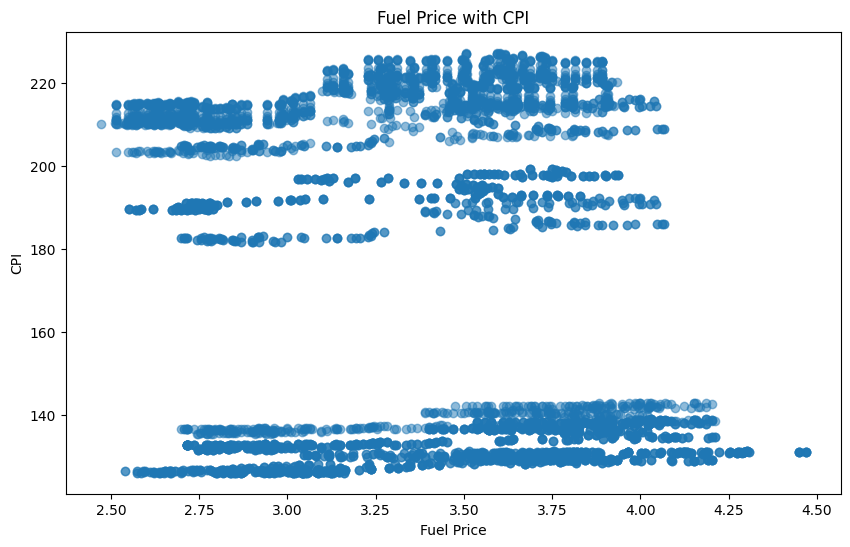

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(data = df, x = 'Fuel_Price', y = 'CPI', alpha = 0.5)
plt.title('Fuel Price with CPI')
plt.xlabel('Fuel Price')
plt.ylabel('CPI')
plt.show()

*No significant correlation between Fuel Price and CPI*

CPI

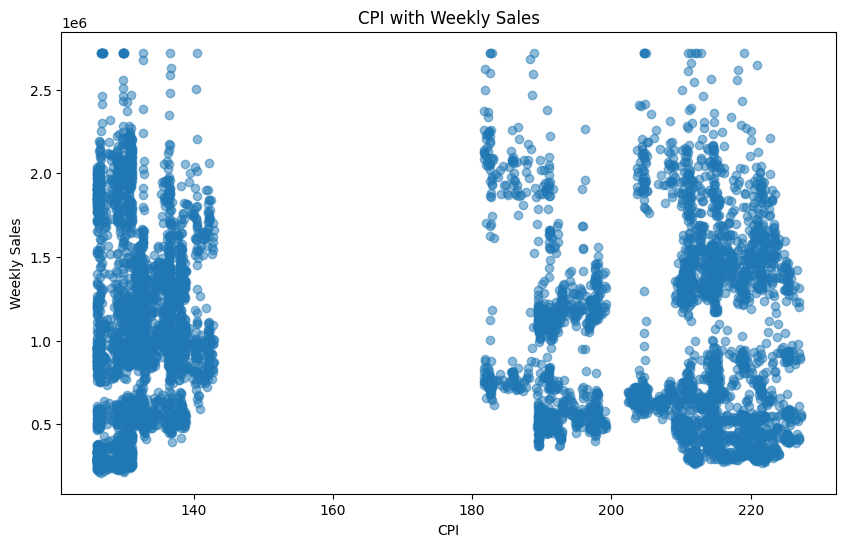

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(data = df, x = 'CPI', y = 'Weekly_Sales', alpha = 0.5)
plt.title('CPI with Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

No sigificant correlation of CPI with Weekly Sales

<Axes: xlabel='Date'>

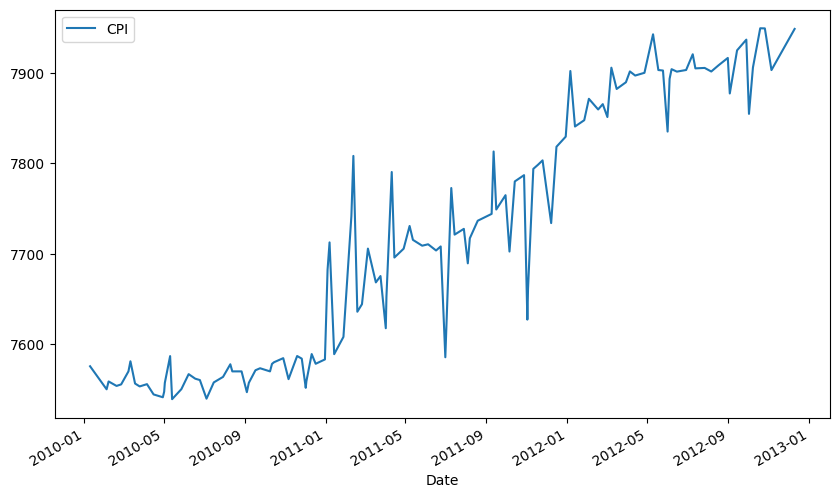

In [ ]:
cpi_with_date = df.groupby('Date')[['CPI']].sum()
cpi_with_date.plot(figsize=(10,6))

*Increase in CPI over the years.*

<Axes: xlabel='CPI', ylabel='Count'>

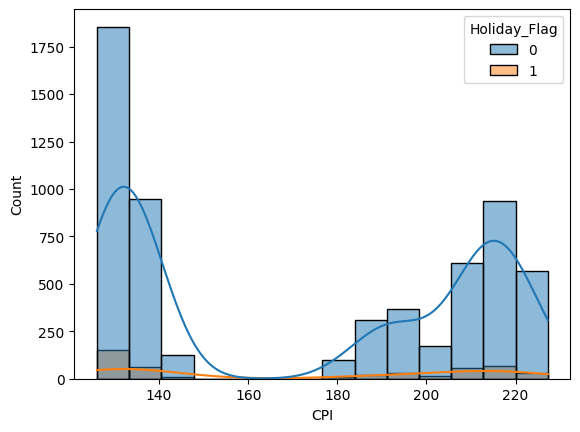

In [ ]:
sns.histplot(df, x = 'CPI', hue = 'Holiday_Flag', kde = True)

*Unemployment*

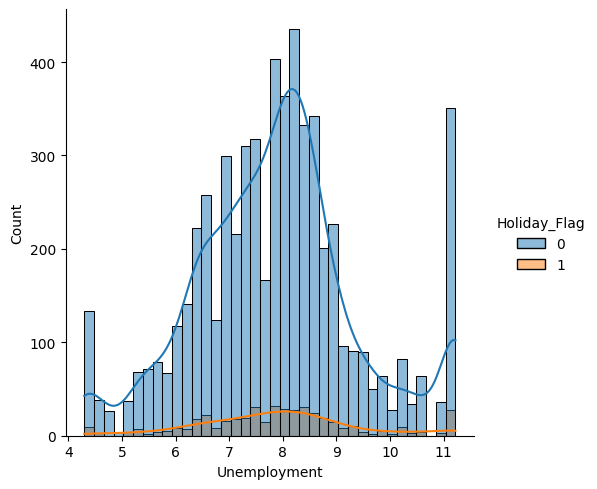

In [ ]:
sns.displot(df, x='Unemployment', hue='Holiday_Flag',kde=True)

<Axes: xlabel='Date'>

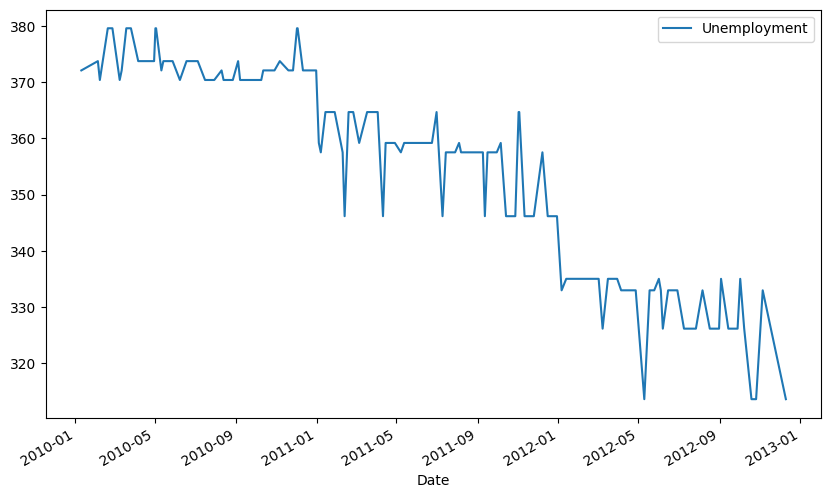

In [ ]:
unemp_with_date = df.groupby('Date')[['Unemployment']].sum()
unemp_with_date.plot(figsize=(10,6))

*Unemployment also increased over the years, significant dip in the unemployment can be seen from 2010 t0 2013*

<Figure size 1200x800 with 0 Axes>

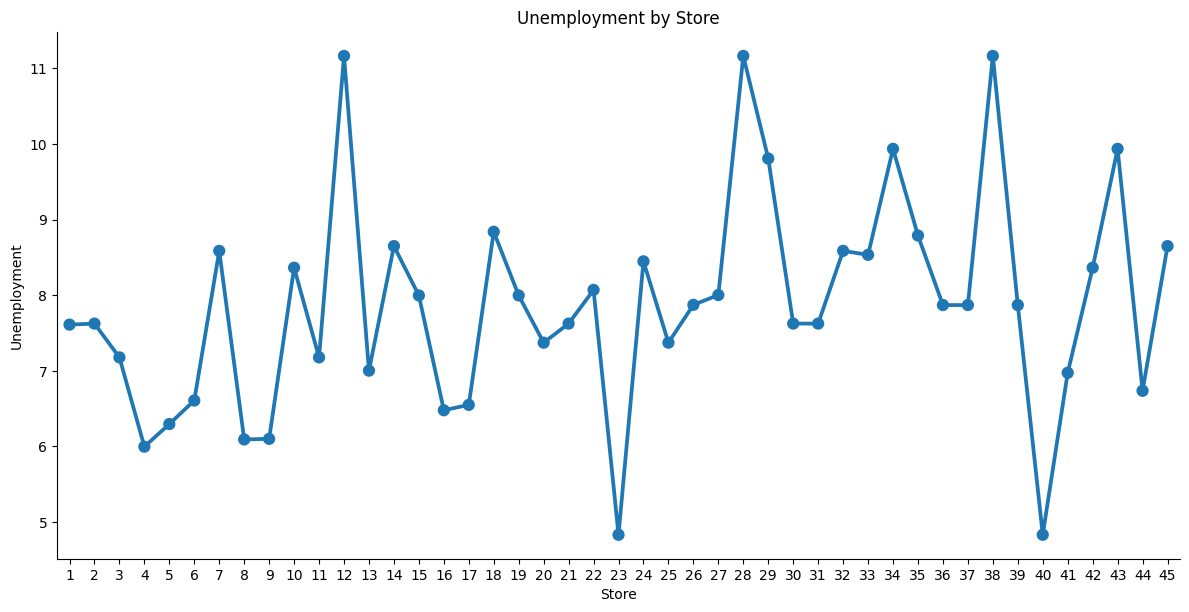

In [ ]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Store', y='Unemployment', kind='point', data=df, height=6, aspect=2, errorbar=None)
plt.title('Unemployment by Store')
plt.xlabel('Store')
plt.ylabel('Unemployment')
plt.show()

*Unemployment is most in stores 12, 28, 38 and lowest in store 23 and 40.*

# Time Series Analysis

In [ ]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()
weekly_sales.head

<bound method NDFrame.head of Date
2010-01-10    42239875.87
2010-02-04    50423831.26
2010-02-07    48917484.50
2010-02-19    48276993.78
2010-02-26    43968571.13
                 ...     
2012-10-08    47403451.04
2012-10-19    45122410.57
2012-10-26    45544116.29
2012-11-05    46925878.99
2012-12-10    46128514.25
Name: Weekly_Sales, Length: 143, dtype: float64>

In [ ]:
df_sales = pd.DataFrame(weekly_sales)

In [ ]:
df_sales.reset_index(inplace=True)
df_sales

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [ ]:
df_sales["Date"] = pd.to_datetime(df_sales["Date"], format = "%Y-%m")

In [ ]:
df_sales

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [ ]:
df_sales = df_sales.set_index("Date")

In [ ]:
df_sales

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13
...,...
2012-10-08,47403451.04
2012-10-19,45122410.57
2012-10-26,45544116.29


In [ ]:
import statsmodels.api as sm
from pylab import rcParams

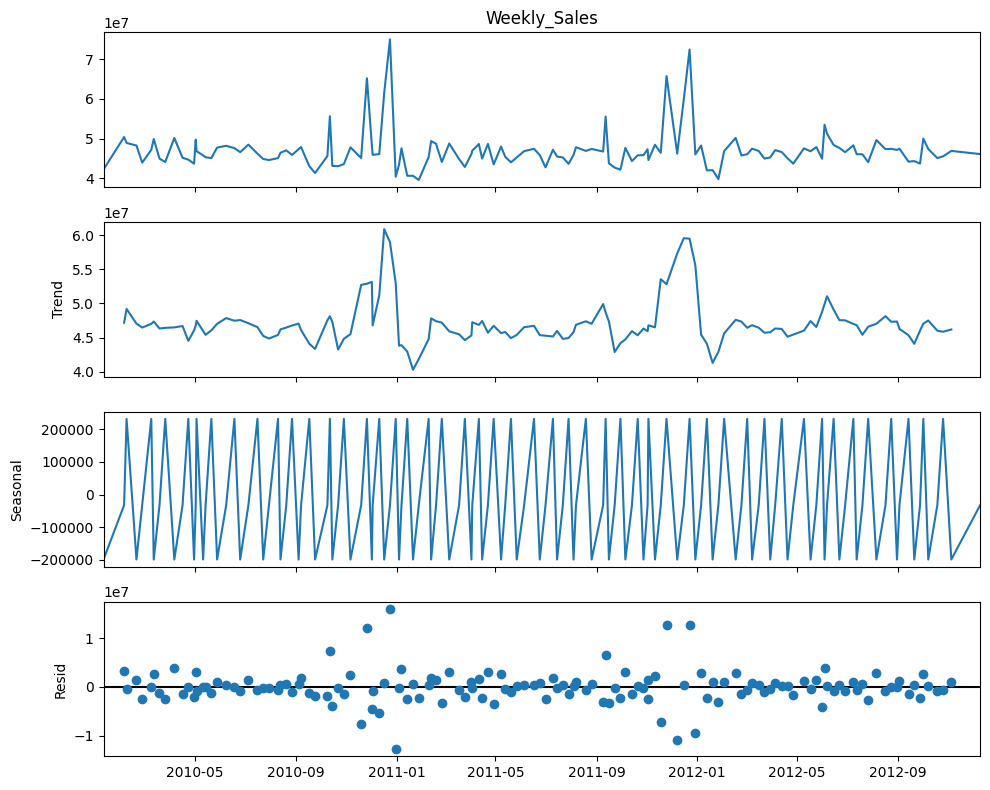

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
decomposition = sm.tsa.seasonal_decompose(df_sales["Weekly_Sales"], model = "additive", period = 3)
decomposition.plot()
plt.show()

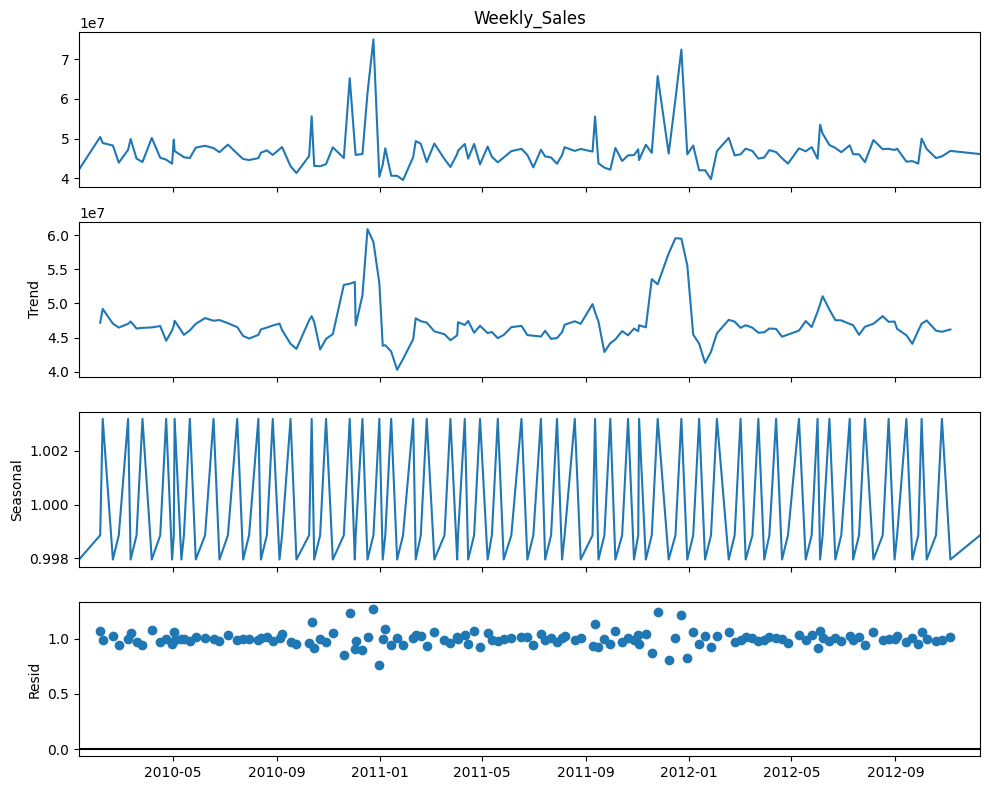

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
decomposition = sm.tsa.seasonal_decompose(df_sales["Weekly_Sales"], model = "multiplicative", period = 3)
decomposition.plot()
plt.show()

*The above 2 graphs of decomposing the data show us that there is **seasionality** in the data.*

*To check the stationarity of the dataset, we use the **Adfuller test**.*

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
dftest = adfuller(df_sales['Weekly_Sales'], autolag = "AIC")
print('1. ADF: ', dftest[0])
print('2. P-value: ', dftest[1])
print('3. Num of lags:',dftest[2] )
print('4. Num of observations Used for ADF Regression and Critical Values Calculation: ', dftest[3])
print('5. Critical Values:')
for key, values in dftest[4].items():
    print("\t", key, ": ", values)

1. ADF:  -9.797935910800264
2. P-value:  6.103232960980554e-17
3. Num of lags: 0
4. Num of observations Used for ADF Regression and Critical Values Calculation:  142
5. Critical Values:
	 1% :  -3.477261624048995
	 5% :  -2.8821181874544233
	 10% :  -2.5777431104939494


*The data is **stationary** according to the adfuller test.*
*The p-value associated with the ADF statistic is very small, approximately 6.10e-17. A small p-value (typically below a significance level like 0.05) indicates that you can reject the null hypothesis.*



In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

<Figure size 1000x800 with 0 Axes>

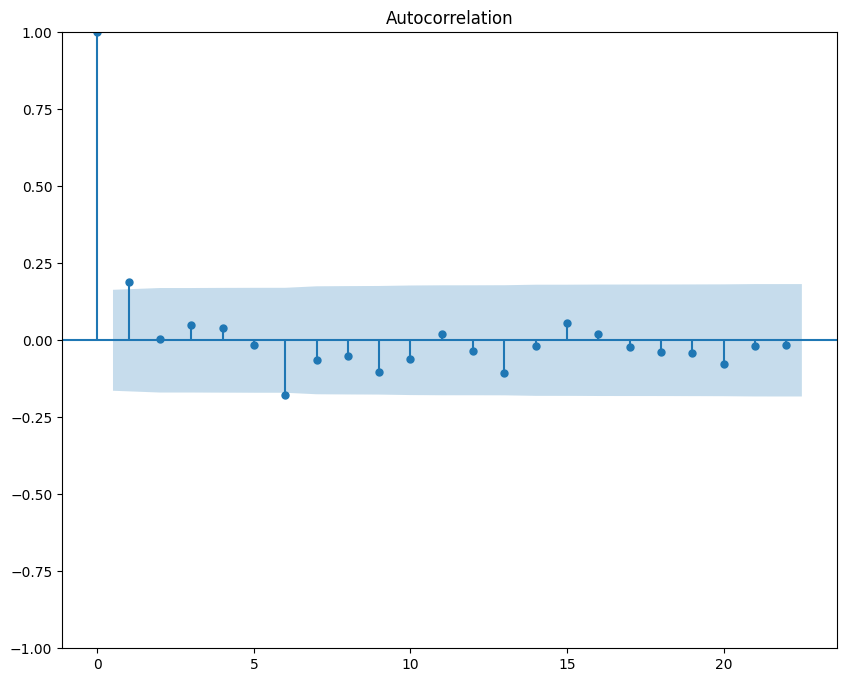

In [ ]:
plt.figure(figsize=(10,8))
plot_acf(df_sales['Weekly_Sales']);

*We plot the autocorrelation plot to understand the degree of similarity between changes in two successive time intervals in a time series.*

*Here the data is evenly distributed in the positive and negative nature and shows no specific correlation between the sales except from the two lags outside the confidence interval.*

<Figure size 1000x800 with 0 Axes>

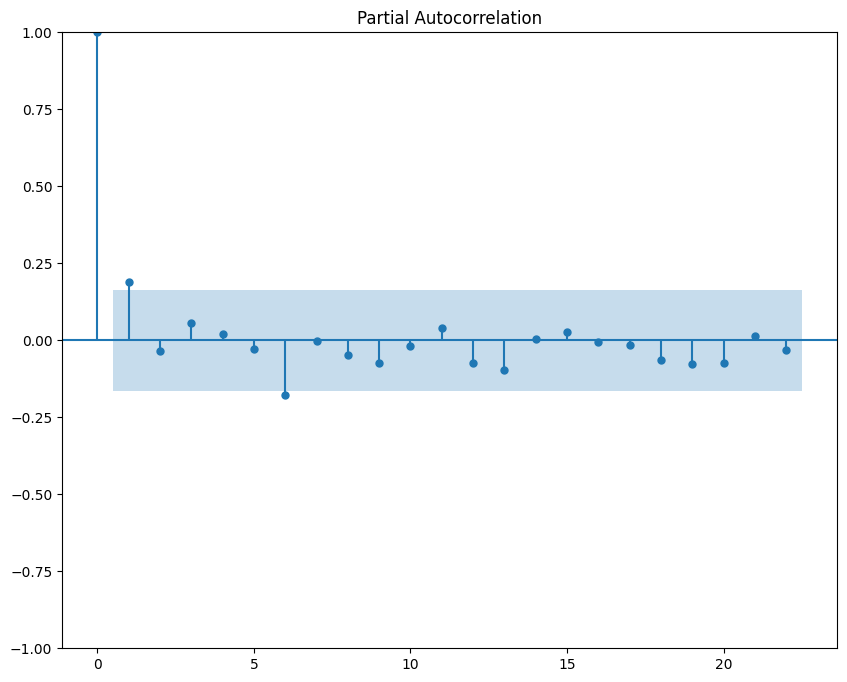

In [ ]:
plt.figure(figsize=(10,8))
plot_pacf(df_sales['Weekly_Sales']);

*Partial autocorrelation in a time series can be considered as the degree of correlation between an observation in a given time with the observations own lagged value.*

# Splitting the Data

In [ ]:
y_train = df_sales[0:125]
y_test = df_sales[115:143]

In [ ]:
y_train

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13
...,...
2012-06-04,53502315.87
2012-06-07,51253021.88
2012-06-15,48412110.70


In [ ]:
y_test

,Weekly_Sales
Date,
2012-04-27,43716798.89
2012-05-10,47566639.31
2012-05-18,46823939.22
2012-05-25,47892463.31
2012-06-01,44955421.95
2012-06-04,53502315.87
2012-06-07,51253021.88
2012-06-15,48412110.70
2012-06-22,47668284.97


# ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
model = pm.auto_arima(df_sales, start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      start_d=1,  max_d = 3 ,
                      seasonal=True,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4817.941, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4819.157, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4815.923, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4815.734, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5461.938, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4817.788, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4819.750, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5365.328, Time=0.19 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.932 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -2404.867
Date:                Sun, 03 Dec 2023   AIC                           4815.734
Time:                        14:44:2

# Prediction with ARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

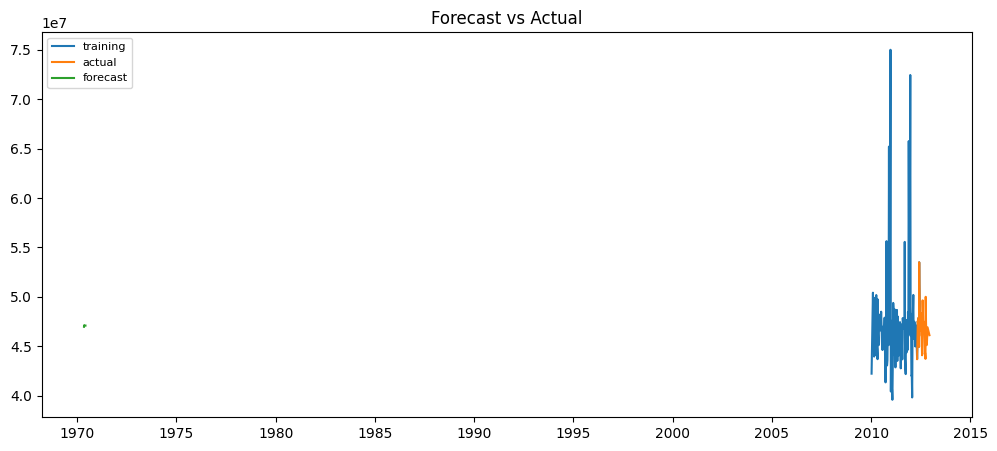

In [ ]:
model = sm.tsa.arima.ARIMA(y_train, order=(1,0,1))
fitted = model.fit()

# Forecast
fc = fitted.forecast(steps=len(y_test), alpha=0.08)

fc_series = pd.Series(fc)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, label='training')
plt.plot(y_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

*Since the ARIMA model was not able to predict the sales for the next 12 weeks and while searching for an appropraite timeseries model -  I came accross a Model named Holt- Winters Exponential smoothing.*

*Exponential Smoothing: A forecasting method for univariate time series data that gives more weight to recent observations and less weight to older observations. It's particularly useful for data with no clear trend or seasonality.*

*Holt-Winters Exponential Smoothing: An extension of exponential smoothing that considers both trend and seasonality in time series data. It includes three smoothing equations: one for the level (average), one for the trend, and one for the seasonality*

*We will try using Holt-Winters Exponential Smoothing for the prediction as well.*

# Holt -Winters Exponentail Smoothing Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
fitted_model =  ExponentialSmoothing(y_train['Weekly_Sales'], trend = 'mul', seasonal='mul', seasonal_periods= 6).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


*Predicting the sales for next 28 weeks with the fitted model*

In [ ]:
y_pred = fitted_model.forecast(28)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
y_pred

125    4.706650e+07
126    4.794392e+07
127    4.827680e+07
128    4.725609e+07
129    4.877460e+07
130    4.684087e+07
131    4.711511e+07
132    4.799343e+07
133    4.832666e+07
134    4.730489e+07
135    4.882497e+07
136    4.688924e+07
137    4.716377e+07
138    4.804299e+07
139    4.837657e+07
140    4.735375e+07
141    4.887540e+07
142    4.693767e+07
143    4.721248e+07
144    4.809261e+07
145    4.842653e+07
146    4.740265e+07
147    4.892587e+07
148    4.698614e+07
149    4.726123e+07
150    4.814228e+07
151    4.847654e+07
152    4.745160e+07
dtype: float64

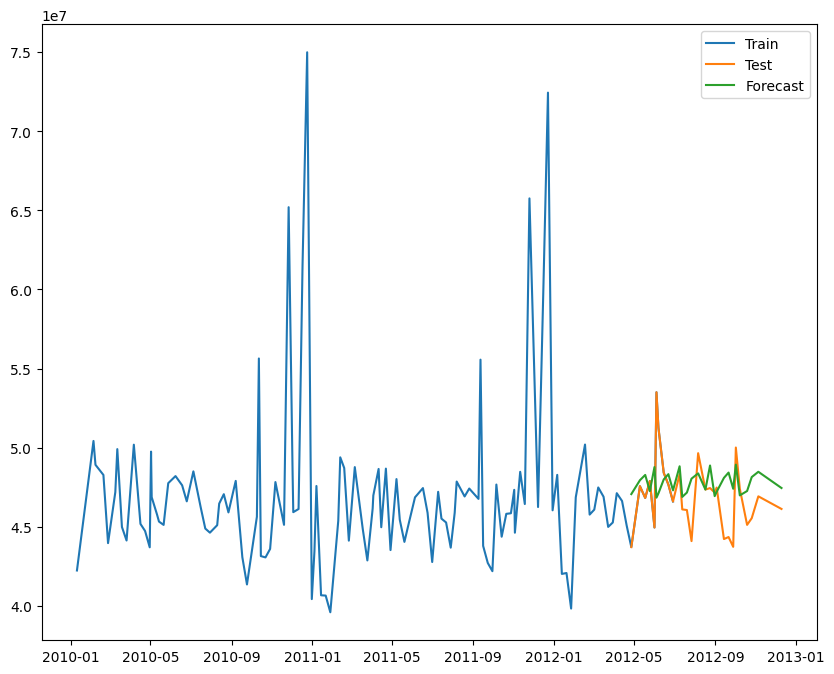

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_train["Weekly_Sales"], label = "Train")
plt.plot(y_test["Weekly_Sales"], label = "Test")
plt.plot(y_test.index, y_pred, label = "Forecast")

plt.legend()

The prediction shows that there would be a stable increase and decrease in the weekly sales of the Walmart and it somehow follows the trend of the actual data. The prediction is different from the test set as there is no sudden peak and decrease in the sales.

# Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

1873760.353121476

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

6225930620687.337

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

2495181.480511455

In [ ]:
y_test.describe()

,Weekly_Sales
count,2.800000e+01
mean,4.698275e+07
std,2.273486e+06
min,4.371680e+07
25%,4.543869e+07
50%,4.704276e+07
75%,4.772433e+07
max,5.350232e+07


*As the RMSE of this model is closer to the standard deviation of actual values of y, this model is a better fit in forecasting the weekly sales.*